# Import the libraries

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_

In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (int)((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis='columns')  # drop columns with NaN
    df = df.select_dtypes(include=[np.number])  # keep only numeric columns
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {df}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


## Importing DataSet

In [6]:
df = pd.read_csv('dataset/zombies.csv' , delimiter=',', nrows = 1000)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head(10)

There are 200 rows and 14 columns


,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,1,Human,18,Female,Rural,1,0,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
1,2,Human,18,Male,Rural,3,24,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
2,3,Human,18,Male,Rural,4,16,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
3,4,Human,19,Male,Rural,1,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,NaN
4,5,Human,19,Male,Urban,1,0,Food,Medication,No tools,First aid supplies,Sanitation,NaN,NaN
5,6,Human,19,Female,Urban,1,0,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
6,7,Human,20,Female,Suburban,2,0,No food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
7,8,Human,20,Female,Rural,2,0,Food,No medication,No tools,No first aid supplies,Sanitation,Clothing,NaN
8,9,Human,21,Female,Urban,1,8,No food,No medication,tools,First aid supplies,Sanitation,Clothing,Documents
9,10,Human,21,Female,Rural,2,8,No food,No medication,tools,First aid supplies,Sanitation,Clothing,Documents


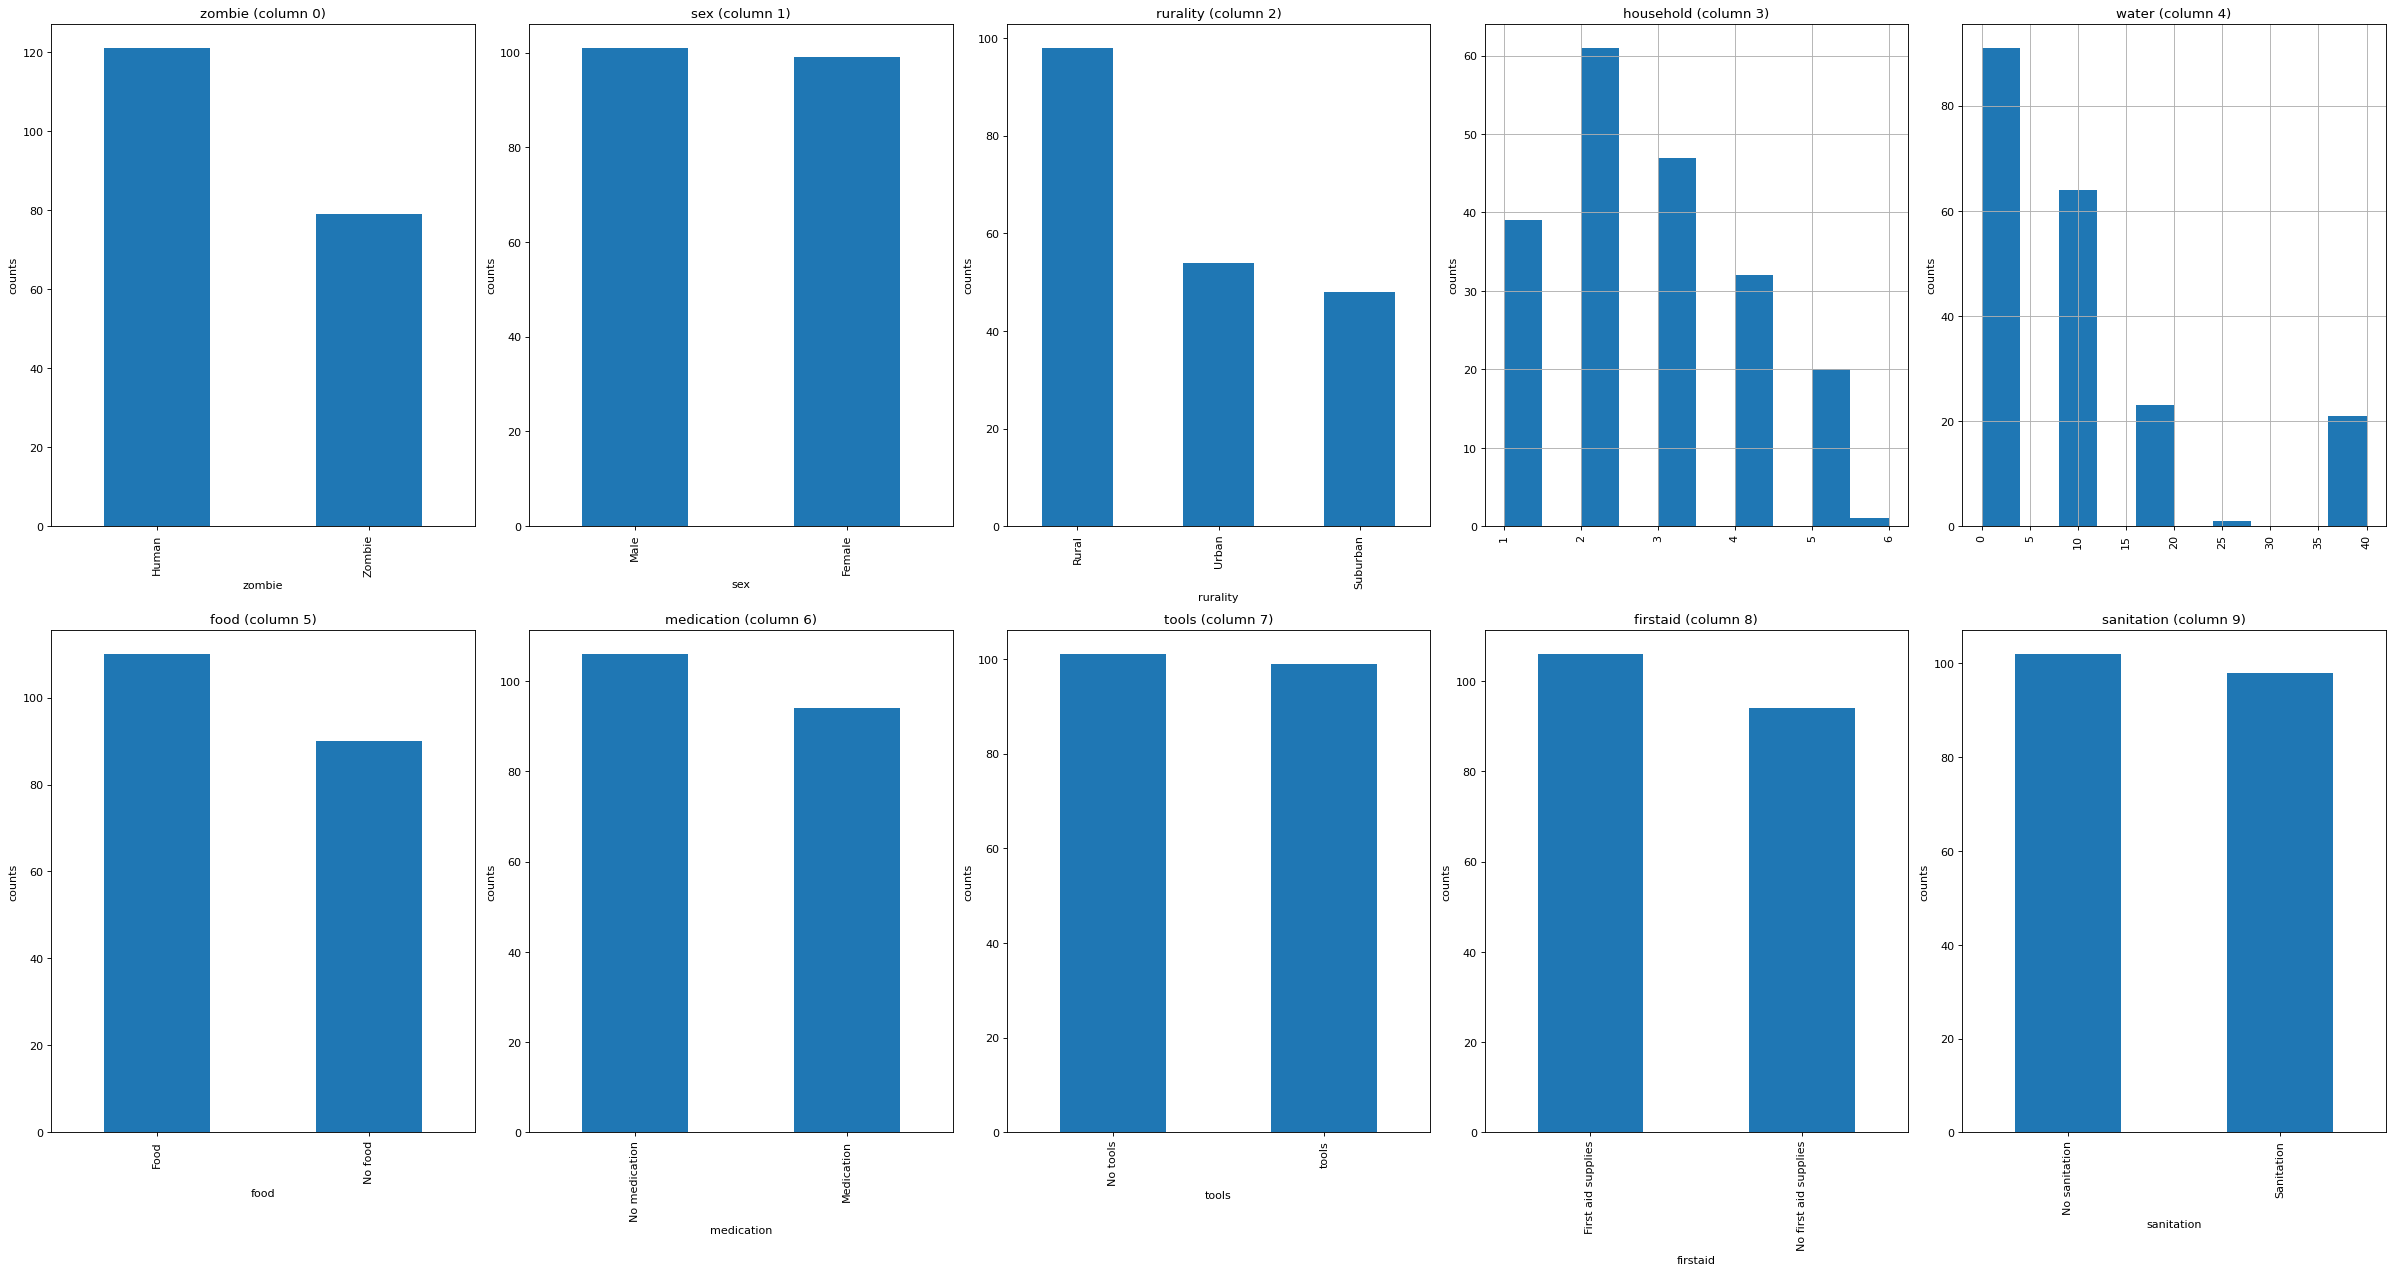

In [7]:
plotPerColumnDistribution(df, 10, 5)

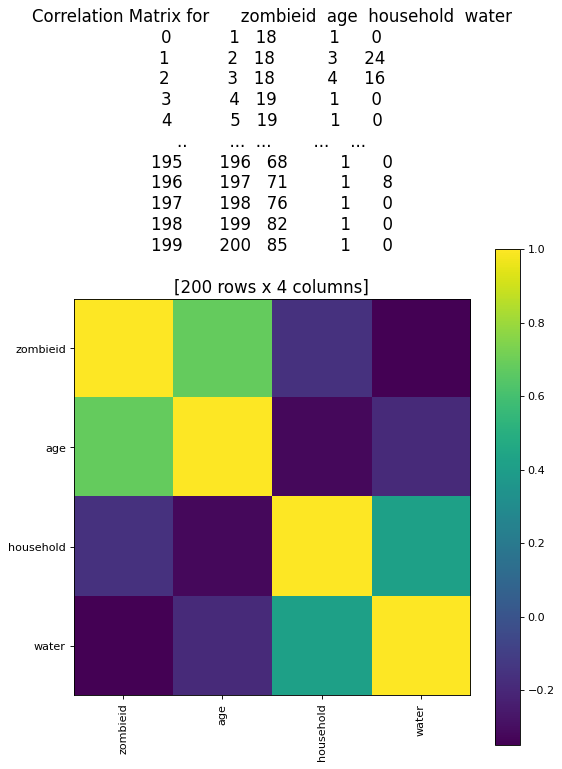

In [8]:
plotCorrelationMatrix(df, 8)

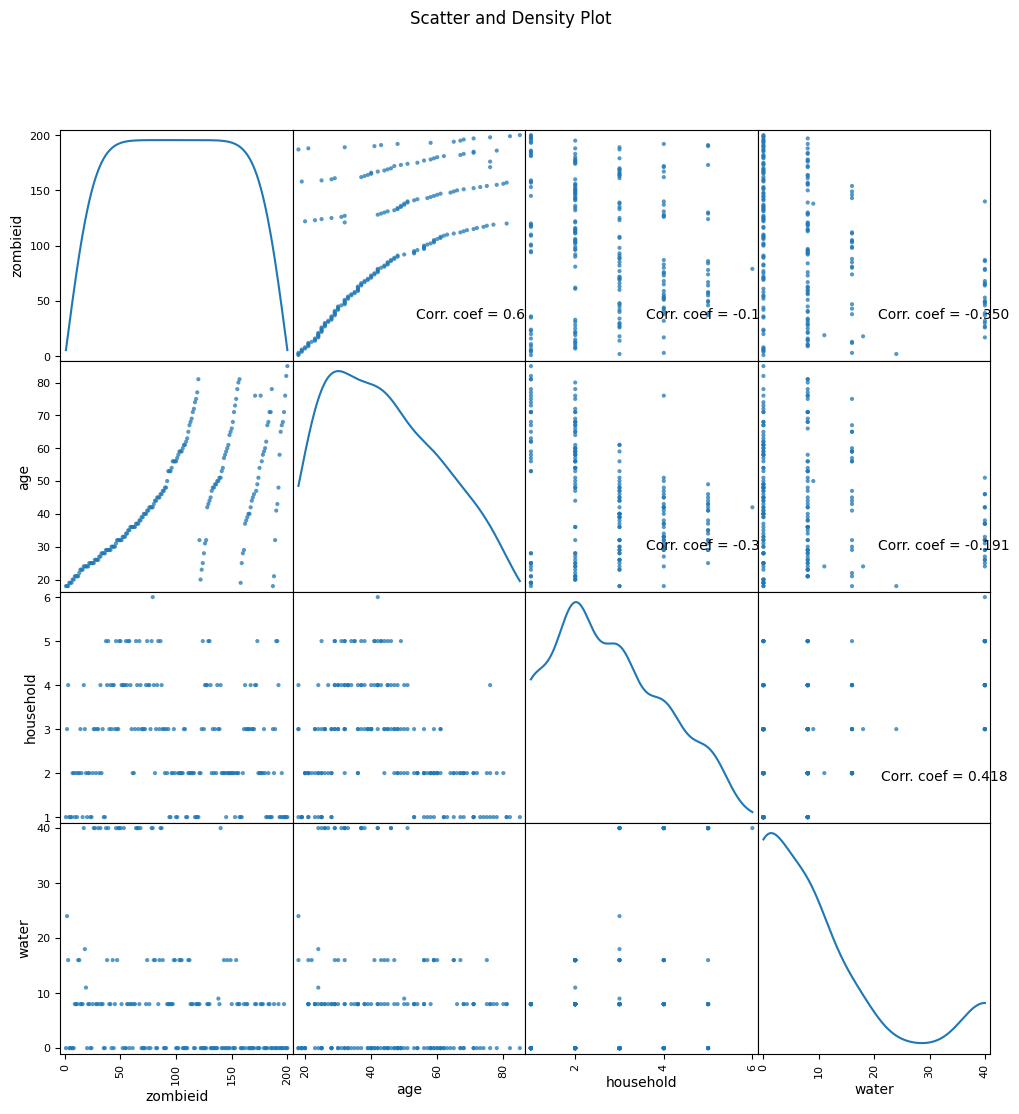

In [9]:
plotScatterMatrix(df, 12, 10)

In [10]:
df.describe()

,zombieid,age,household,water
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.415000,2.680000,8.750000
std,57.879185,17.371865,1.263162,12.069626
min,1.000000,18.000000,1.000000,0.000000
25%,50.750000,29.000000,2.000000,0.000000
50%,100.500000,42.000000,2.500000,8.000000
75%,150.250000,58.000000,4.000000,8.000000
max,200.000000,85.000000,6.000000,40.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zombieid    200 non-null    int64 
 1   zombie      200 non-null    object
 2   age         200 non-null    int64 
 3   sex         200 non-null    object
 4   rurality    200 non-null    object
 5   household   200 non-null    int64 
 6   water       200 non-null    int64 
 7   food        200 non-null    object
 8   medication  200 non-null    object
 9   tools       200 non-null    object
 10  firstaid    200 non-null    object
 11  sanitation  200 non-null    object
 12  clothing    126 non-null    object
 13  documents   66 non-null     object
dtypes: int64(4), object(10)
memory usage: 22.0+ KB


Fixing the null valued columns by categorizing into 1 & 0 for thrier respective columns --> `Clothing` & `Documents`

In [12]:
print('Unique values : ',df['clothing'].unique())
print('Unique values : ',df['documents'].unique())

Unique values :  ['Clothing' nan]
Unique values :  [nan 'Documents']


In [13]:
df['documents'] = df['documents'].fillna(0)
df['documents'] = df['documents'].replace('Documents', 1)

In [14]:
df['clothing'] = df['clothing'].fillna(0)
df['clothing'] = df['clothing'].replace('Clothing', 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zombieid    200 non-null    int64 
 1   zombie      200 non-null    object
 2   age         200 non-null    int64 
 3   sex         200 non-null    object
 4   rurality    200 non-null    object
 5   household   200 non-null    int64 
 6   water       200 non-null    int64 
 7   food        200 non-null    object
 8   medication  200 non-null    object
 9   tools       200 non-null    object
 10  firstaid    200 non-null    object
 11  sanitation  200 non-null    object
 12  clothing    200 non-null    int64 
 13  documents   200 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 22.0+ KB


Dropping column not required 

In [16]:
df = df.drop('zombieid', axis=1)

In [17]:
# Define the columns to be label encoded
columns_to_encode = ['zombie','sex', 'rurality', 'household', 'food', 'medication', 'tools','firstaid','sanitation','clothing','documents']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and apply label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
df.medication = df.medication.replace({1: 0, 0: 1})
df.firstaid = df.firstaid.replace({1: 0, 0: 1})

In [18]:
df.describe()

,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,0.395000,44.415000,0.50500,0.780000,1.680000,8.750000,0.450000,0.470000,0.49500,0.530000,0.490000,0.630000,0.330000
std,0.490077,17.371865,0.50123,0.845681,1.263162,12.069626,0.498742,0.500352,0.50123,0.500352,0.501154,0.484016,0.471393
min,0.000000,18.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,42.000000,1.00000,1.000000,1.500000,8.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,58.000000,1.00000,2.000000,3.000000,8.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,85.000000,1.00000,2.000000,5.000000,40.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   zombie      200 non-null    int32
 1   age         200 non-null    int64
 2   sex         200 non-null    int32
 3   rurality    200 non-null    int32
 4   household   200 non-null    int64
 5   water       200 non-null    int64
 6   food        200 non-null    int32
 7   medication  200 non-null    int32
 8   tools       200 non-null    int32
 9   firstaid    200 non-null    int32
 10  sanitation  200 non-null    int32
 11  clothing    200 non-null    int64
 12  documents   200 non-null    int64
dtypes: int32(8), int64(5)
memory usage: 14.2 KB


In [20]:
df.head(10)

,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,0,18,0,0,0,0,0,1,0,1,1,1,0
1,0,18,1,0,2,24,0,1,1,1,1,1,0
2,0,18,1,0,3,16,0,1,0,1,1,1,0
3,0,19,1,0,0,0,0,1,1,0,1,1,0
4,0,19,1,2,0,0,0,1,0,1,1,0,0
5,0,19,0,2,0,0,0,1,1,1,1,1,0
6,0,20,0,1,1,0,1,1,0,1,1,1,0
7,0,20,0,0,1,0,0,0,0,0,1,1,0
8,0,21,0,2,0,8,1,0,1,1,1,1,1
9,0,21,0,0,1,8,1,0,1,1,1,1,1


Split the data into dependent and independent variables

In [21]:
# Creating Independent Variable DataFrame
x = df.iloc[:,1:13]
x.head()

,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,18,0,0,0,0,0,1,0,1,1,1,0
1,18,1,0,2,24,0,1,1,1,1,1,0
2,18,1,0,3,16,0,1,0,1,1,1,0
3,19,1,0,0,0,0,1,1,0,1,1,0
4,19,1,2,0,0,0,1,0,1,1,0,0


In [22]:
# Creating Dependent Variable DataFrame
y = df.iloc[:,0]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: zombie, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.1,random_state = 42)

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [25]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [26]:
from sklearn.metrics import accuracy_score
# Assuming you have your model predictions and true labels

y_pred = [round(pred) for pred in rf.predict(X_test)]
y_true = y_test

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9


In [27]:
import pickle

trained_model = rf

# Save the trained model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(trained_model, file)
